#1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
jokes_data = pd.read_csv("jokes.csv")  
jokes_data.head() 

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [106]:
ratings_data = jokes_data.iloc[0:200]
ratings_data

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [107]:
ratings_data.isnull().sum().sum()

0

In [108]:
ratings_df = ratings_data.replace(99,0)

In [109]:
ratings_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [110]:
mean_rating = ratings_df.drop('NumJokes', axis = 1)

In [111]:
mean_rating.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [112]:
mean_ratings = mean_rating.mean(axis = 0)

In [113]:
mean_ratings.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

### Q5. List most popular 10 jokes

In [114]:
popular_jokes=mean_ratings.sort_values(ascending=False).head(10)

In [115]:
popular_jokes

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [116]:
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\agopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packag

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [117]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [118]:
print(books.columns)
print(ratings.columns)
print(users.columns)

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Index(['userID', 'ISBN', 'bookRating'], dtype='object')
Index(['userID', 'Location', 'Age'], dtype='object')


In [119]:
books_df = books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis= 1)

In [120]:
books_df

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [121]:
ratings_new = pd.merge(books_df, ratings, on='ISBN')
#ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [122]:
ratings_new = pd.merge(ratings_new, users, on ='userID')
#ratings_new = ratings_new[ratings.userID.isin(users.userID)]

In [123]:
ratings_new

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",NaN
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,"timmins, ontario, canada",NaN
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,8,0,"timmins, ontario, canada",NaN
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,8,0,"timmins, ontario, canada",NaN
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,8,0,"timmins, ontario, canada",NaN
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,"timmins, ontario, canada",NaN


# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [124]:
ratings_new = ratings_new[ratings_new['bookRating'] != 0]

In [125]:
ratings_new

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating,Location,Age
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,"timmins, ontario, canada",NaN
12,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,"timmins, ontario, canada",NaN
13,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,"timmins, ontario, canada",NaN
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,"timmins, ontario, canada",NaN
16,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999,Kensington Publishing Corp.,8,6,"timmins, ontario, canada",NaN
17,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,8,7,"timmins, ontario, canada",NaN
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,"ottawa, ontario, canada",49.0
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,"ottawa, ontario, canada",49.0
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,"ottawa, ontario, canada",49.0


# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

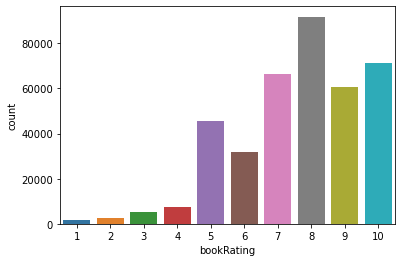

In [126]:
sns.countplot(ratings_new['bookRating'])

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [127]:
ratings_new.groupby("bookRating")["userID"].agg("count").nlargest(100)

bookRating
8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: userID, dtype: int64

In [128]:
counts_1 = pd.value_counts(ratings_new['userID'])

In [129]:
ratings_2 = ratings_new[ratings_new['userID'].isin(counts_1[counts_1 >100].index)]

In [130]:
ratings_2.shape

(102371, 9)

In [131]:
ratings_2

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating,Location,Age
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,"n/a, n/a, n/a",NaN
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,"n/a, n/a, n/a",NaN
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,11676,8,"n/a, n/a, n/a",NaN
84,0440234743,The Testament,John Grisham,1999,Dell,11676,9,"n/a, n/a, n/a",NaN
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,11676,8,"n/a, n/a, n/a",NaN
86,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,11676,7,"n/a, n/a, n/a",NaN
87,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,11676,10,"n/a, n/a, n/a",NaN
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11676,6,"n/a, n/a, n/a",NaN
90,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,11676,10,"n/a, n/a, n/a",NaN
91,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,11676,8,"n/a, n/a, n/a",NaN


In [132]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import NormalPredictor
reader = Reader(rating_scale=(1, 10))

In [133]:
# The columns must correspond to user id, book Title and ratings (in that order).
data = Dataset.load_from_df(ratings_new[['userID', 'ISBN', 'bookRating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([2.50415217, 2.49933257]),
 'test_mae': array([1.99903121, 1.9952487 ]),
 'fit_time': (0.31082797050476074, 0.4030756950378418),
 'test_time': (1.237339973449707, 1.2031974792480469)}

In [134]:
data.df.head()

,userID,ISBN,bookRating
1,8,0002005018,5
9,8,074322678X,5
12,8,0887841740,5
13,8,1552041778,5
15,8,1567407781,6


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [135]:
from surprise import accuracy
from surprise.model_selection import train_test_split
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25, random_state = 45)

algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# display predictions
predictions

[Prediction(uid=57255, iid='051510566X', r_ui=5.0, est=6.512361957930916, details={'was_impossible': False}),
 Prediction(uid=226874, iid='0143035002', r_ui=9.0, est=7.774872551742425, details={'was_impossible': False}),
 Prediction(uid=259378, iid='0415106001', r_ui=5.0, est=6.7004692291490775, details={'was_impossible': False}),
 Prediction(uid=104636, iid='0440414806', r_ui=10.0, est=9.146803885146436, details={'was_impossible': False}),
 Prediction(uid=276641, iid='0747260850', r_ui=7.0, est=7.090665499243223, details={'was_impossible': False}),
 Prediction(uid=271705, iid='0385494246', r_ui=7.0, est=7.780717910258087, details={'was_impossible': False}),
 Prediction(uid=218568, iid='0515125040', r_ui=9.0, est=7.8475536319168055, details={'was_impossible': False}),
 Prediction(uid=53220, iid='0451180429', r_ui=8.0, est=7.906274309603522, details={'was_impossible': False}),
 Prediction(uid=164096, iid='0140072659', r_ui=10.0, est=7.547982997834245, details={'was_impossible': False}),

In [136]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(predictions, verbose=True)

User-based Model : Test Set
RMSE: 1.6407


1.640706158106703

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [137]:
pred_df = pd.DataFrame(predictions)
pred_df

,uid,iid,r_ui,est,details
0,57255,051510566X,5.0,6.512362,{'was_impossible': False}
1,226874,0143035002,9.0,7.774873,{'was_impossible': False}
2,259378,0415106001,5.0,6.700469,{'was_impossible': False}
3,104636,0440414806,10.0,9.146804,{'was_impossible': False}
4,276641,0747260850,7.0,7.090665,{'was_impossible': False}
5,271705,0385494246,7.0,7.780718,{'was_impossible': False}
6,218568,0515125040,9.0,7.847554,{'was_impossible': False}
7,53220,0451180429,8.0,7.906274,{'was_impossible': False}
8,164096,0140072659,10.0,7.547983,{'was_impossible': False}
9,11724,0809225050,9.0,7.513043,{'was_impossible': False}


In [141]:
def getrecommendations(userid, num):
    user = pred_df[pred_df['uid'] == userid][['uid','iid','r_ui','est']].sort_values(by='est', ascending = False).head(num)
    return user

In [143]:
# providing the no of recommendations for the user...
getrecommendations(53590,10)

,uid,iid,r_ui,est
65499,53590,0060930535,10.0,8.341845
91282,53590,0345361792,9.0,8.234106
18184,53590,0671749609,7.0,7.808038
44257,53590,034539044X,7.0,7.721713
513,53590,1573228230,8.0,7.718791
12251,53590,009925672X,7.0,7.438801
11131,53590,0679736875,9.0,7.140728
17637,53590,0375703861,9.0,6.882185


In [144]:
# providing the recommendations for the user
getrecommendations(32440,15)

,uid,iid,r_ui,est
47140,32440,0671776975,10.0,8.078333
8176,32440,0802139256,7.0,8.065424
7307,32440,000649840X,8.0,8.044700
58901,32440,0140055770,7.0,7.813772
85487,32440,0440467012,8.0,7.728716
57099,32440,0452282152,9.0,7.690386
5060,32440,0802136877,7.0,7.647369
20250,32440,0140271562,7.0,7.632022
94915,32440,0833542664,8.0,7.595476
85571,32440,0440403642,8.0,7.595476
